In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

Average overall sentiment is -0.0009709999999999952
Sentiment of top 10 influential people is -0.09098000000000002
Sentiment of top 10 retweeted tweets is -0.225
General public has more positive sentiments than top 10 influential people about melania


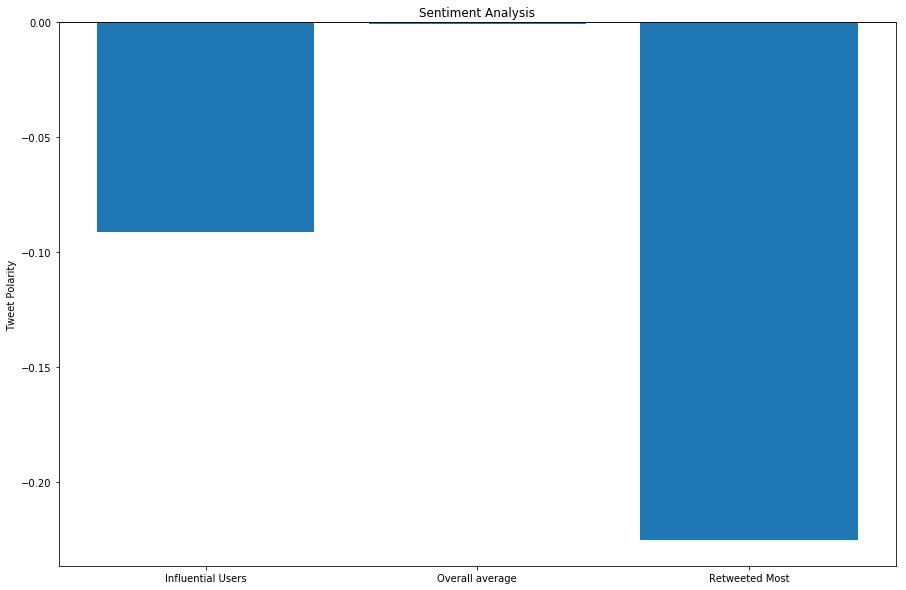

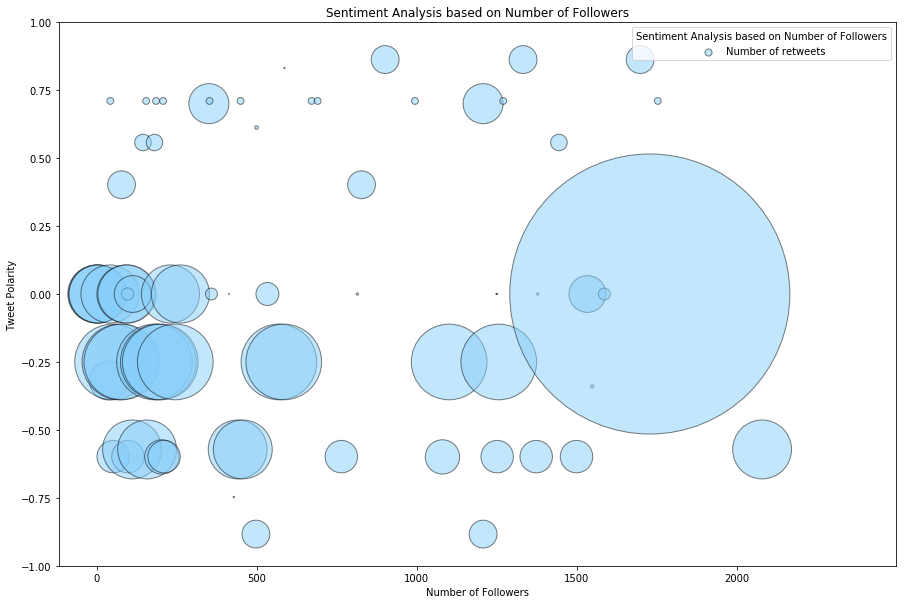

In [4]:

def getSentiments(target_term):
    # Get 100 recent tweets and create lists of tweets, sentiments, followers and retweets
    public_tweets = api.search(target_term, count=100, lang="en", result_type="recent")
    tweets = []
    sentiments = []
    followers = []
    retweets = []
    for tweet in public_tweets['statuses']:
        tweets.append(tweet['text'])
        followers.append(tweet['user']['followers_count'])
        retweets.append(tweet['retweet_count'])
        result = analyzer.polarity_scores(tweet["text"])
        sentiments.append(result['compound'])
    # Create a dataframe by combining all the lists    
    combined_df = pd.DataFrame({'Followers':followers,'Sentiments':sentiments, 'Retweets':retweets, 'Tweets':tweets})
    
    # Calculate average sentiment of top 10 users with most followers
    top_10_followers = combined_df.nlargest(10, 'Followers')
    top_10_followers_average = top_10_followers['Sentiments'].mean()

    top_10_retweets = combined_df.nlargest(10, 'Retweets')
    top_10_retweets_average = top_10_retweets['Sentiments'].mean()

    overal_average = combined_df['Sentiments'].mean()
    
    # Print analysis
    print('Average overall sentiment is ' + str(overal_average))
    print('Sentiment of top 10 influential people is '+str(top_10_followers_average))
    print('Sentiment of top 10 retweeted tweets is '+str(top_10_retweets_average))

    if top_10_followers_average>overal_average:
        print('Top 10 influential people have more positive sentiments than general public about '+target_term)
    else:
        print('General public has more positive sentiments than top 10 influential people about '+target_term)
    
    #Draw bar chart for sentiments
    plt.figure(figsize= (15,10))    
    titles = ['Influential Users','Retweeted Most','Overall average']
    sent = [top_10_followers_average, top_10_retweets_average, overal_average]
    plt.bar(titles, sent)

    plt.title("Sentiment Analysis")
    plt.ylabel("Tweet Polarity")
    plt.axhline(0, color = 'black')
    plt.savefig("output_9_1.png")
    plt.show()
    
    # Draw scatter chart for sentiments, number of followers and number of retweets    
    # Remove users with top 20 follower count to allow more meaningful visualization
    combined_df1 = combined_df.nsmallest(80, 'Followers')
    plt.figure(figsize= (15,10))
    plt.scatter(combined_df1['Followers'], combined_df1['Sentiments'], color="lightskyblue", edgecolor="black"
                , label="Number of retweets", alpha=0.5, s=combined_df1['Retweets'], linewidths=1)
    plt.title("Sentiment Analysis based on Number of Followers")
    plt.xlabel("Number of Followers")
    plt.ylabel("Tweet Polarity")
    plt.ylim (-1.0,1.0)

    lgnd=plt.legend(loc="upper right", title="Sentiment Analysis based on Number of Followers", scatterpoints=1)
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[0]._sizes = [50]

    plt.savefig("output_8_1.png")
    plt.show()
    
    

getSentiments('melania')